## SECP3223-02 Project - WHO TB Infection Estimates in Household Contacts

## Group DataPioneers

### Muhammad Nur Azhar Bin Mohd Yazid (A22EC0220) - Project Lead
### Che Marhumi Bin Che Ab Rahim (A22EC0147)
### Muhammad Safwan Bin Mohd Azmi (A22EC0221)

## Data Dictionary

| **Column Name**                 | **Description**                                                                                     | **Data Type** |
|----------------------------------|-----------------------------------------------------------------------------------------------------|---------------|
| `country`                       | Name of the country                                                                                 | Category      |
| `iso2`                          | 2-letter ISO country code (some missing values)                                                     | Category      |
| `iso3`                          | 3-letter ISO country code                                                                            | Category      |
| `iso_numeric`                   | Numeric ISO country code                                                                             | Integer       |
| `g_whoregion`                   | WHO regional affiliation                                                                             | Category      |
| `year`                          | Year of the estimate                                                                                 | Integer       |
| `source_hh`                     | Source of household size data                                                                        | Category      |
| `e_hh_size`                     | Estimated average household size                                                                     | Float         |
| `prevtx_data_available`         | Indicator of whether previous treatment data is available                                            | Float         |
| `newinc_con_prevtx`             | New TB cases in contacts with previous treatment (partially available)                              | Float         |
| `newinc_con04_prevtx`           | New TB cases in children under 5 years in contacts with previous treatment                           | Float         |
| `e_hh_contacts`                 | Estimated total household contacts                                                                   | Float         |
| `e_hh_contacts_lo`              | Lower bound of estimated household contacts                                                         | Float         |
| `e_hh_contacts_hi`              | Upper bound of estimated household contacts                                                         | Float         |
| `e_prevtx_hh_contacts_pct`      | Percentage of household contacts with previous TB treatment                                          | Float         |
| `e_prevtx_hh_contacts_pct_lo`   | Lower bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_hh_contacts_pct_hi`   | Upper bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_eligible`             | Estimated number of individuals eligible for treatment                                               | Float         |
| `e_prevtx_eligible_lo`          | Lower bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_eligible_hi`          | Upper bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_kids_pct`             | Percentage of eligible individuals who are children                                                  | Float         |
| `e_prevtx_kids_pct_lo`          | Lower bound of the percentage of eligible children                                                   | Float         |
| `e_prevtx_kids_pct_hi`          | Upper bound of the percentage of eligible children                                                   | Float         |
| `household_contact_rate`        | Derived feature: household contact rate (total contacts divided by household size)                   | Float         |


## Research Questions Related to the Dataset

### 1. What is the relationship between average household size and TB prevalence among household contacts across different WHO regions?

- Larger household sizes may facilitate the spread of TB due to increased close contact. Analyzing this relationship regionally can reveal socio-environmental factors influencing TB transmission.

- Novelty: Investigates a less-explored link between household dynamics and disease spread at a regional level.

### 2. How does the proportion of children eligible for TB treatment vary across countries and what socio-economic or health system factors might explain these variations?

- Motivation: Children are a vulnerable group for TB, yet treatment coverage for them is often inadequate. Identifying patterns and predictors could help target interventions.

- Novelty: Focuses on children’s vulnerability in the context of TB eligibility, combining epidemiological and socio-economic analysis.

### 3. How has the availability of previous treatment data impacted the accuracy of TB incidence estimates in household contacts?

- Motivation: Assessing the role of data availability on estimation accuracy can help improve methods for future epidemiological studies.

- Novelty: Explores the methodological implications of incomplete data on TB estimates, an often-overlooked aspect of public health research.

### 4. What are the temporal trends in TB treatment eligibility and prevalence among household contacts, and how do these trends correlate with national TB control policies?

- Motivation: Understanding how policies influence treatment eligibility and prevalence over time can inform the effectiveness of current strategies.

- Novelty: Links policy interventions to measurable outcomes in TB control, offering evidence for policy improvement.

### 5. Are there regional disparities in the percentage of household contacts with previous TB treatment, and how do these disparities influence the overall burden of TB?

- Motivation: Previous TB treatment among household contacts may affect reinfection rates and transmission dynamics. Regional disparities could highlight inequities in health systems.

- Novelty: Combines spatial and epidemiological analyses to uncover inequities in TB reinfection risks and burden distribution.

## Part A: Data Cleaning
### Step 1: Load the dataset

In [118]:
import pandas as pd

file_path = 'LTBI_estimates.csv'
tb_data = pd.read_csv(file_path)

### Step 2: Understanding the Data

In [119]:
# Basic info and summary statistics
tb_data.info()
tb_data.describe(include='all')

# Check for missing values
print()
print("Missing values for each rows:")
missing_values = tb_data.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1710 non-null   object 
 1   iso2                          1701 non-null   object 
 2   iso3                          1710 non-null   object 
 3   iso_numeric                   1710 non-null   int64  
 4   g_whoregion                   1710 non-null   object 
 5   year                          1710 non-null   int64  
 6   source_hh                     1710 non-null   object 
 7   e_hh_size                     1710 non-null   float64
 8   prevtx_data_available         1564 non-null   float64
 9   newinc_con_prevtx             753 non-null    float64
 10  newinc_con04_prevtx           1068 non-null   float64
 11  ptsurvey_newinc               14 non-null     float64
 12  ptsurvey_newinc_con04_prevtx  14 non-null     float64
 13  e_h

### Step 3: Handling Missing Values

In [120]:
# (a) Drop columns with excessive missing values (>90% missing)
columns_to_drop = ['ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx']
tb_data_cleaned = tb_data.drop(columns=columns_to_drop)

# (b) Fill numeric missing values with the median
numeric_cols = tb_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col] = tb_data_cleaned[col].fillna(tb_data_cleaned[col].median())

# (c) Fill categorical missing values with the mode
categorical_cols = tb_data_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col] = tb_data_cleaned[col].fillna(tb_data_cleaned[col].mode()[0])


### Step 4: Standardize Data Types

In [121]:
# Convert categorical columns to the 'category' type
tb_data_cleaned['country'] = tb_data_cleaned['country'].astype('category')
tb_data_cleaned['iso3'] = tb_data_cleaned['iso3'].astype('category')
tb_data_cleaned['g_whoregion'] = tb_data_cleaned['g_whoregion'].astype('category')
tb_data_cleaned['source_hh'] = tb_data_cleaned['source_hh'].astype('category')


### Step 5: Derive New Features

In [122]:
# Calculate household_contact_rate
tb_data_cleaned['household_contact_rate'] = (tb_data_cleaned['e_hh_contacts'] / tb_data_cleaned['e_hh_size']) * 100

# Calculate infection_rate
tb_data_cleaned['infection_rate'] = (tb_data_cleaned['newinc_con_prevtx'] / tb_data_cleaned['e_hh_contacts']) * 100

# Categorize infection_rate
def categorize_infection_rate(rate):
    if rate < 10:
        return 'Low'
    elif rate < 50:
        return 'Medium'
    else:
        return 'High'

tb_data_cleaned['infection_category'] = tb_data_cleaned['infection_rate'].apply(categorize_infection_rate)


### Step 6: Handle Inconsistent or Duplicate Rows

In [123]:
float_columns = tb_data_cleaned.select_dtypes(include=['float64']).columns
tb_data_cleaned[float_columns] = tb_data_cleaned[float_columns].round(2)

tb_data_cleaned.dropna(subset=['country', 'iso3', 'year'], inplace=True)

tb_data_cleaned = tb_data_cleaned.drop_duplicates()

### Step 7: Validate Data Integrity

In [124]:
assert (tb_data_cleaned['e_prevtx_eligible_lo'] <= tb_data_cleaned['e_prevtx_eligible']).all()
assert (tb_data_cleaned['e_prevtx_eligible'] <= tb_data_cleaned['e_prevtx_eligible_hi']).all()

print(tb_data_cleaned.isnull().sum())

country                        0
iso2                           0
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
source_hh                      0
e_hh_size                      0
prevtx_data_available          0
newinc_con_prevtx              0
newinc_con04_prevtx            0
e_hh_contacts                  0
e_hh_contacts_lo               0
e_hh_contacts_hi               0
e_prevtx_hh_contacts_pct       0
e_prevtx_hh_contacts_pct_lo    0
e_prevtx_hh_contacts_pct_hi    0
e_prevtx_eligible              0
e_prevtx_eligible_lo           0
e_prevtx_eligible_hi           0
e_prevtx_kids_pct              0
e_prevtx_kids_pct_lo           0
e_prevtx_kids_pct_hi           0
household_contact_rate         0
infection_rate                 0
infection_category             0
dtype: int64


In [125]:
print(tb_data_cleaned.info())
print("\nCleaned Dataset Description")
print(tb_data_cleaned.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   country                      1710 non-null   category
 1   iso2                         1710 non-null   object  
 2   iso3                         1710 non-null   category
 3   iso_numeric                  1710 non-null   int64   
 4   g_whoregion                  1710 non-null   category
 5   year                         1710 non-null   int64   
 6   source_hh                    1710 non-null   category
 7   e_hh_size                    1710 non-null   float64 
 8   prevtx_data_available        1710 non-null   float64 
 9   newinc_con_prevtx            1710 non-null   float64 
 10  newinc_con04_prevtx          1710 non-null   float64 
 11  e_hh_contacts                1710 non-null   float64 
 12  e_hh_contacts_lo             1710 non-null   float64 
 13  e_h

### Step 8: Export Cleaned Data

In [126]:
# Save the cleaned dataset for further analysis
tb_data_cleaned.to_csv('LTBI_cleaned_data.csv', index=False)

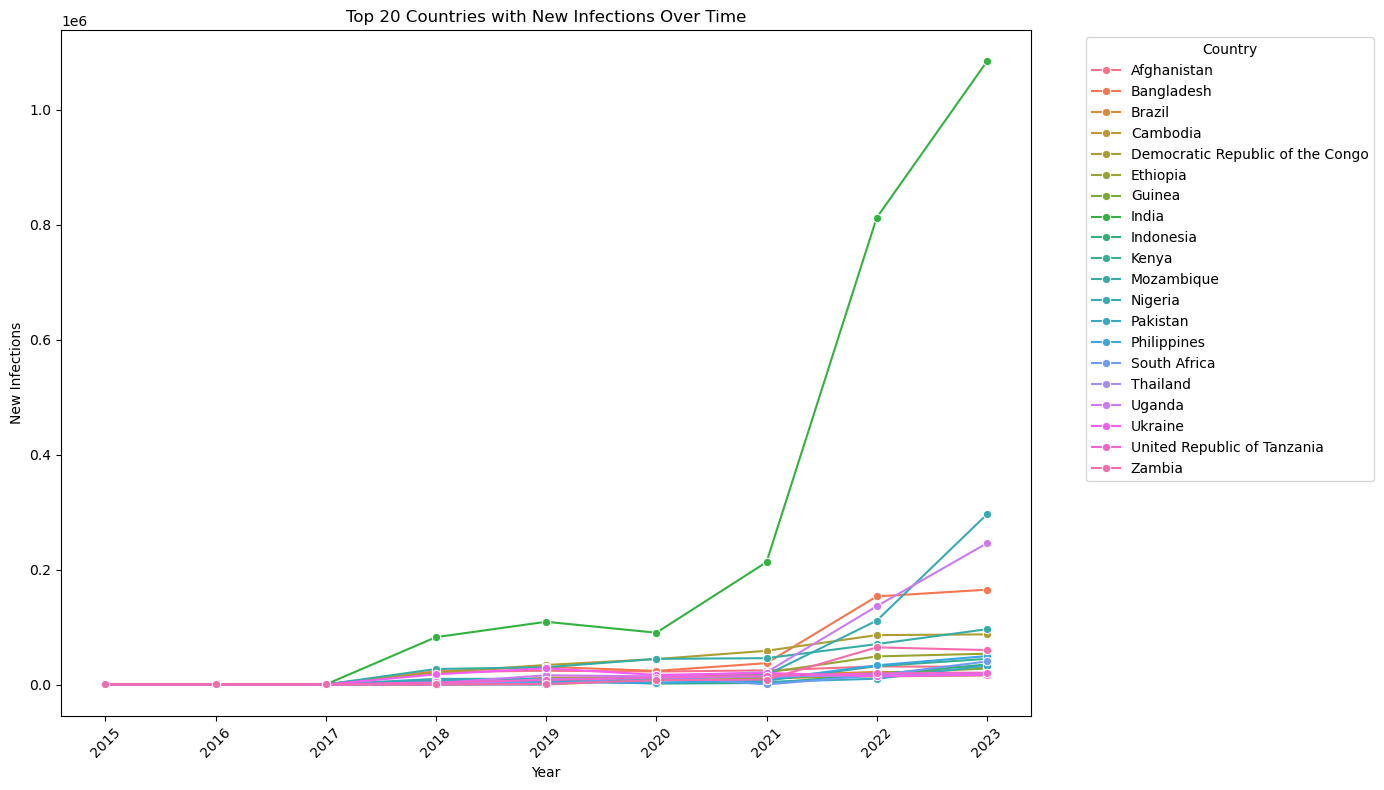

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
tb_data_cleaned = pd.read_csv('LTBI_cleaned_data.csv')

# Step 1: Calculate total new infections per country
top_countries = tb_data_cleaned.groupby('country')['newinc_con_prevtx'].sum().nlargest(20).index

# Step 2: Filter the dataset for only these top countries
top_data = tb_data_cleaned[tb_data_cleaned['country'].isin(top_countries)]

# Step 3: Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_data, x='year', y='newinc_con_prevtx', hue='country', marker='o')

# Customize the plot
plt.title('Top 20 Countries with New Infections Over Time')
plt.xlabel('Year')
plt.ylabel('New Infections')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()
